In [1]:
import imageio as imageio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from tqdm import tqdm

In [2]:
order = ['Other', 'Setosa']

In [3]:

from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, palette, resolution=0.02, same_aspect=False):

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 3, X[:, 0].max() + 3
    x2_min, x2_max = X[:, 1].min() - 3, X[:, 1].max() + 3
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.autoscale(True)
    ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=palette)
    plt.autoscale(False)

    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(palette.values()))

    if same_aspect:
        plt.gca().set_aspect('equal', adjustable='box')

    _ = ax.set_xlabel('petal length (cm)')
    _ = ax.set_ylabel('petal width (cm)')
    return ax

In [4]:
out_dir = os.path.join(os.getcwd(), "../../out/classification/logistic_regression")

In [5]:
from sklearn.preprocessing import StandardScaler

# sepal length,sepal width,petal length,petal width,name
df = pd.read_csv('data/iris.csv')[['sepal length', 'sepal width', 'petal length', 'petal width', 'name']].rename(columns={
    'sepal length': 'sepal length (cm)',
    'sepal width': 'sepal width (cm)',
    'petal length': 'petal length (cm)',
    'petal width': 'petal width (cm)',
})

numeric_cols = [
    'sepal width (cm)', 'petal length (cm)', 'sepal length (cm)', 'petal width (cm)'
]
df[numeric_cols] = StandardScaler().fit_transform(df[numeric_cols])

df['setosa'] = df['name'].apply(lambda name: 'Setosa' if name == 'Setosa' else 'Other')
df['versicolor'] = df['name'].apply(lambda name: 'Versicolor' if name == 'Versicolor' else 'Other')
df['virginica'] = df['name'].apply(lambda name: 'Virginica' if name == 'Virginica' else 'Other')

display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),name,setosa,versicolor,virginica
0,-0.900681,1.032057,-1.341272,-1.312977,Setosa,Setosa,Other,Other
1,-1.143017,-0.124958,-1.341272,-1.312977,Setosa,Setosa,Other,Other
2,-1.385353,0.337848,-1.398138,-1.312977,Setosa,Setosa,Other,Other
3,-1.506521,0.106445,-1.284407,-1.312977,Setosa,Setosa,Other,Other
4,-1.021849,1.263460,-1.341272,-1.312977,Setosa,Setosa,Other,Other
...,...,...,...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,Virginica,Other,Other,Virginica
146,0.553333,-1.281972,0.705893,0.922064,Virginica,Other,Other,Virginica
147,0.795669,-0.124958,0.819624,1.053537,Virginica,Other,Other,Virginica
148,0.432165,0.800654,0.933356,1.447956,Virginica,Other,Other,Virginica


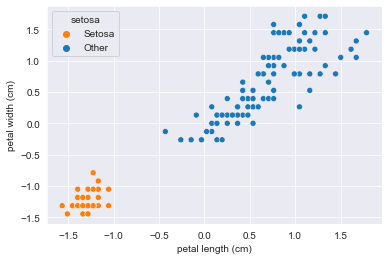

In [6]:
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='setosa', palette=dict(zip(
    order,
    sns.color_palette()
)))
plt.savefig(os.path.join(out_dir, 'example-data-only.png'), bbox_inches='tight')
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[order])
ys = oe.fit_transform(df[['setosa']])
clf = LogisticRegression().fit(df[['petal length (cm)', 'petal width (cm)']].values, ys)

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


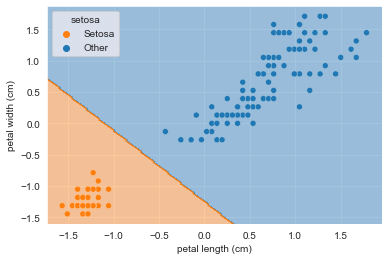

In [8]:
plot_decision_regions(df[['petal length (cm)', 'petal width (cm)']].values, df['setosa'], clf,
    palette=dict(zip(
        order,
        sns.color_palette()
)))
plt.savefig(os.path.join(out_dir, 'example-data-with-model.png'), bbox_inches='tight')
plt.show()

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/matplotlib/patches.py:1117: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.asarray(xy)


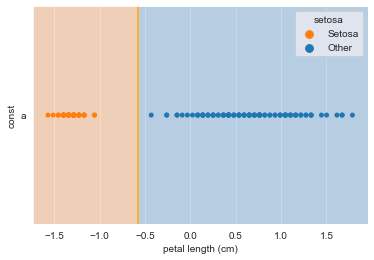

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[order])
ys = oe.fit_transform(df[['setosa']])
clf = LogisticRegression().fit(df[['petal length (cm)']].values, ys)

threshold = -clf.intercept_ / clf.coef_[0] # b0 + b1 * x1 == 0 => x1 = -bo / b1

plt.autoscale(True)

df['const'] = 'a'
ax = sns.stripplot(data=df, x='petal length (cm)', y='const', hue='setosa', jitter=False, palette=dict(zip(
    order,
    sns.color_palette()
)))

plt.autoscale(False)
ax.axvspan(threshold, df['petal length (cm)'].max() + 3, facecolor=sns.color_palette()[0], alpha=0.25, label='Other')
ax.axvspan(-2, threshold, facecolor=sns.color_palette()[1], alpha=0.25, label='Setosa')

plt.plot([threshold, threshold], [-1, 1], color='orange')

plt.savefig(os.path.join(out_dir, 'example-data-with-model-1d.png'), bbox_inches='tight')
plt.show()

In [10]:
clf = LogisticRegression().fit(df[['petal length (cm)', 'petal width (cm)', 'sepal length (cm)']].values, ys)

print(clf.intercept_)
print(clf.coef_)

[-3.04053819]
[[-2.37576721 -2.12260487 -0.62882984]]


/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df.loc[df['setosa'] == 'Other', 'petal length (cm)'], df.loc[df['setosa'] == 'Other', 'petal width (cm)'], df.loc[df['setosa'] == 'Other', 'sepal length (cm)'], color=sns.color_palette()[0])
ax.scatter(df.loc[df['setosa'] == 'Setosa', 'petal length (cm)'], df.loc[df['setosa'] == 'Setosa', 'petal width (cm)'], df.loc[df['setosa'] == 'Setosa', 'sepal length (cm)'], color=sns.color_palette()[1])

# b0 + b1*x1 + b2*x2 + b3*x3 = 0
# x3 = (-b0 - b1*x1 - b2*x2) / b2
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (-clf.intercept_ - clf.coef_[0][0]*X - clf.coef_[0][1]*Y) / clf.coef_[0][2]

plt.autoscale(False)
surf = ax.plot_surface(X, Y, Z, linewidth=0, antialiased=False, alpha=0.25, color='orange')

ax.set_axis_off()

filenames = []
print("Generate frames...")
for ii in tqdm(range(0, 360, 2)):
    ax.view_init(elev=10., azim=ii)
    filename = os.path.join(out_dir, f"example-data-with-model-3d.frame{ii}.png")
    plt.savefig(filename, bbox_inches='tight')
    filenames.append(filename)

# build gif
print("Build GIF...")
with imageio.get_writer(os.path.join(out_dir, 'example-data-with-model-3d.gif'), mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Remove files
print("Delete generated frames...")
for filename in set(filenames):
    os.remove(filename)

print("All done")
plt.close()

Generate frames...


100%|██████████| 180/180 [00:35<00:00,  5.04it/s]
/var/folders/7d/vvm6spgd0k97dhyt65d21k600000gn/T/ipykernel_40757/1459623987.py:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


Build GIF...
Delete generated frames...
All done


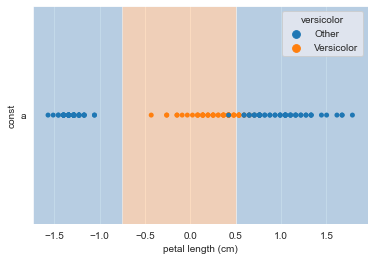

In [12]:
plt.autoscale(True)

versi_order = ['Other', 'Versicolor']

df['const'] = 'a'
ax = sns.stripplot(data=df, x='petal length (cm)', y='const', hue='versicolor', jitter=False, palette=dict(zip(
    versi_order,
    sns.color_palette()
)))

plt.autoscale(False)
ax.axvspan(-2, -0.75, facecolor=sns.color_palette()[0], alpha=0.25, label='Other')
ax.axvspan(-0.75, 0.5, facecolor=sns.color_palette()[1], alpha=0.25, label='Versicolor')
ax.axvspan(0.5, 8, facecolor=sns.color_palette()[0], alpha=0.25, label='Other')

plt.plot([2.5, 2.5], [-1, 1], color='orange')
plt.plot([4.5, 4.5], [-1, 1], color='orange')

plt.savefig(os.path.join(out_dir, 'example-data-with-model-1d-limit.png'), bbox_inches='tight')
plt.show()

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/matplotlib/patches.py:1117: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.asarray(xy)


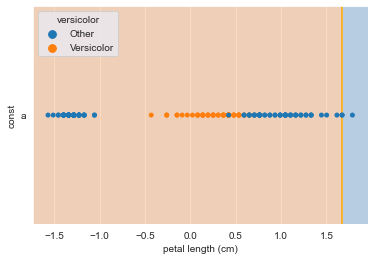

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[versi_order])
ys = oe.fit_transform(df[['versicolor']])
clf = LogisticRegression().fit(df[['petal length (cm)']].values, ys)

threshold = -clf.intercept_ / clf.coef_[0] # b0 + b1 * x1 == 0 => x1 = -bo / b1

plt.autoscale(True)

df['const'] = 'a'
ax = sns.stripplot(data=df, x='petal length (cm)', y='const', hue='versicolor', jitter=False, palette=dict(zip(
    versi_order,
    sns.color_palette()
)))

plt.autoscale(False)
ax.axvspan(threshold, df['petal length (cm)'].max() + 3, facecolor=sns.color_palette()[0], alpha=0.25, label='Other')
ax.axvspan(-2, threshold, facecolor=sns.color_palette()[1], alpha=0.25, label='Versicolor')

plt.plot([threshold, threshold], [-1, 1], color='orange')

plt.savefig(os.path.join(out_dir, 'example-data-with-model-1d-possible.png'), bbox_inches='tight')
plt.show()

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


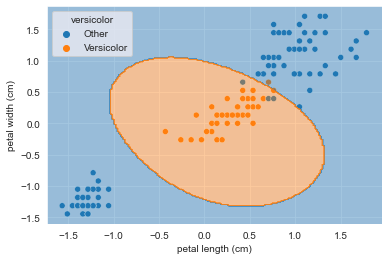

In [14]:
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[versi_order])
ys = oe.fit_transform(df[['versicolor']])
clf = SVC().fit(df[['petal length (cm)', 'petal width (cm)']].values, ys)

plot_decision_regions(df[['petal length (cm)', 'petal width (cm)']].values, df['versicolor'], clf,
                      palette=dict(zip(
                          versi_order,
                          sns.color_palette()
                      )))
plt.savefig(os.path.join(out_dir, 'example-data-with-model-2d-limit.png'), bbox_inches='tight')
plt.show()

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


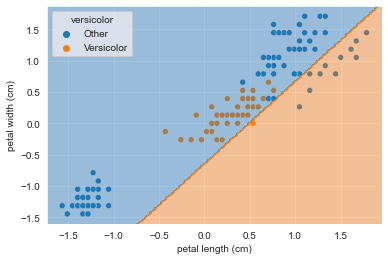

In [15]:
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[versi_order])
ys = oe.fit_transform(df[['versicolor']])
clf = LogisticRegression().fit(df[['petal length (cm)', 'petal width (cm)']].values, ys)

plot_decision_regions(df[['petal length (cm)', 'petal width (cm)']].values, df['versicolor'], clf,
                      palette=dict(zip(
                          versi_order,
                          sns.color_palette()
                      )))
plt.savefig(os.path.join(out_dir, 'example-data-with-model-2d-possible.png'), bbox_inches='tight')
plt.show()